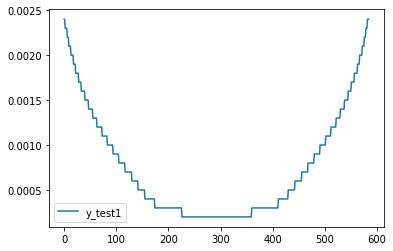

"\nx_train = preprocessing.normalize(x_train)\ny_train = preprocessing.normalize(y_train)\n\nplt.plot(y_train, label='y_train')\nplt.legend()\n\nplt.show()\n\nx_test = preprocessing.normalize(x_test)\ny_test = preprocessing.normalize(y_test)\n\nx_validation = preprocessing.normalize(x_validation)\ny_validation = preprocessing.normalize(y_validation)\n\n"

In [46]:
import os
import sys
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib
import matplotlib.pyplot as plt


script_dir = os.getcwd()
file = 'simulator1.csv'
data = pd.read_csv(file)
data.head()
x_label = ["Azimuth (deg)" , "Elevation (deg)" , "EIRP (dBW)" , "Xmtr Gain (dB)" , "Xmtr EIRP Intensity (dBW/Sterad)" , "Atmos Loss (dB)"]
y_label = ["Rain Loss (dB)" , "CloudsFog Loss (dB)"]


def extract_data(i, j):
    X = []
    Y = []
    for i in range(i, j):
        x_sample = []
        y_sample = []
        for label in x_label:
            x_sample.append(float((data[label][i])))
        X.append(x_sample)
        for label in y_label:
            y_sample.append(float((data[label][i])))
        Y.append(y_sample)
    return np.asarray(X), np.asarray(Y)

x_train, y_train =  extract_data(0, 590)
x_test, y_test = extract_data(595, 1180)
x_validation, y_validation = extract_data(1185, 1691)

y_test1=y_test[:,0]

#print('x_test', x_test)
plt.plot(y_test1, label='y_test1')
plt.legend()

plt.show()
"""
x_train = preprocessing.normalize(x_train)
y_train = preprocessing.normalize(y_train)

plt.plot(y_train, label='y_train')
plt.legend()

plt.show()

x_test = preprocessing.normalize(x_test)
y_test = preprocessing.normalize(y_test)

x_validation = preprocessing.normalize(x_validation)
y_validation = preprocessing.normalize(y_validation)

"""

In [47]:
x_train = x_train.reshape((x_train.shape[0], 1, x_train.shape[2]))
x_test = x_test.reshape((x_test.shape[0], 1, x_test.shape[2]))
print('x_train', x_train)
print('x_test', x_test)

IndexError: tuple index out of range

In [ ]:
import pandas
pandas.__version__
import numpy
#from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import LSTM
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from keras.layers.convolutional import Conv1D    
from numpy import concatenate
import matplotlib
import matplotlib.pyplot as plt



# fix random seed for reproducibility
#numpy.random.seed(7)

In [ ]:
# design network
model = Sequential()
#print(x_train.shape[0])
#print(x_train.shape[2])
#print(len(x_label))

model.add(LSTM(len(x_label), input_shape=(x_train.shape[1], x_train.shape[2])))
#model.add(LSTM(len(x_label), input_shape=(x_train.shape[0], x_train.shape[1], x_train.shape[2], x_train.shape[3], x_train.shape[4], x_train.shape[5])))

#model.add(LSTM(len(x_label), input_shape=(x_train[:,0], x_train[:,1])))
#model.add(LSTM(len(x_label), activation='relu', input_shape=(n_steps, n_features)))

model.add(Dense(2))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(x_train, y_train, epochs=50, batch_size=72, validation_data=(x_test, y_test), verbose=2, shuffle=False)

# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()


In [ ]:
#model.predict(x_test)

In [49]:
# make a prediction
yhat = model.predict(x_test)
x_test = x_test.reshape((x_test.shape[0], x_test.shape[2]))
print(yhat)
print(x_test)

#inv_yhat = concatenate((yhat, x_test[:, 1:]), axis=1)


"""print(yhat)
print("y_test", y_test)
print(len(yhat),len(y_test))
print(x_test)"""

yhat0=yhat[:,0]
yhat1=yhat[:,1]

y_test0=y_test[:,0]
y_test1=y_test[:,1]


#x_test = x_test.reshape((x_test.shape[0], x_test.shape[2]))
#print(yhat, y_test)

plt.plot(yhat0, 'red', label='yhat0')
#plt.show()
#plt.plot(y_test0, label='y_test0')
plt.legend()

plt.show()

plt.plot(yhat1, 'red', label='yhat1')
#plt.show()
#plt.plot(y_test1, label='y_test1')
plt.legend()

plt.show()
#plt.plot(y_test, yhat)
#plt.show()
#plt.plot(yhat, y_test)
#plt.show()


"""
# invert scaling for forecast
inv_yhat = concatenate((yhat, x_test[:, 1:]), axis=1)
# inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
y_test = y_test.reshape((len(y_test), 1))
inv_y = concatenate((y_test, x_test[:, 1:]), axis=1)
# inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)"""

ValueError: Error when checking input: expected lstm_8_input to have 3 dimensions, but got array with shape (585, 6)